# Calorie And Macro Calculator
reference
- https://www.musclehacking.com/calorie-calculator/#the-leangains-method
- https://calculator-online.net/id/body-fat-percentage-calculator/ 

## Standard & Keto

### BMR

In [40]:
def calculate_bmr(gender, weight_kg, height_cm, age):
    bmr = (10 * weight_kg) + (6.25 * height_cm) - (5 * age)
    if gender == 'male':
        return bmr + 5  
    else:
        return bmr - 161

In [41]:
calculate_bmr('male', 80, 180, 23)

1815.0

In [42]:
(1861-1656)*7

1435

### TDEE

In [43]:
def calculate_tdee(bmr, activity_level):
    activity_levels = {
        'sedentary': 1.2,
        'lightly active': 1.375,
        'moderately active': 1.55,
        'very active': 1.725,
        'super active': 1.9
    }

    if activity_level.lower() in activity_levels:
        return bmr * activity_levels[activity_level.lower()]
    else:
        return "Invalid activity level input"

In [44]:
daily_tdee = calculate_tdee(calculate_bmr('male', 80, 180, 23), 'sedentary')
daily_tdee

2178.0

### Daily Calories

In [45]:
def calculate_daily_calories(tdee, goals):
    goal_levels = {
        'lose weight': -0.2,
        'slowly lose weight': -0.1,
        'maintain weight': 0,
        'slowly gain weight': 0.1,
        'gain weight': 0.2
    }
    return tdee + (tdee * goal_levels[goals.lower()])

In [46]:
daily_cal = calculate_daily_calories(calculate_tdee(calculate_bmr('male', 80, 180, 23), 'sedentary'), 'lose weight')
daily_cal

1742.4

### Estimate Lose/Gain Weigth

In [47]:
def estimate_weigth(daily_cal, daily_tdee):
    return round((((daily_tdee - daily_cal)*7)/3500) * 0.453592, 2)

In [48]:
estimate_weigth(1656, 1861)

0.19

### Macro

In [49]:
def calculate_macro(daily_calories, weight_kg, carbs_percentage):
    pounds = weight_kg * 2.20462
    protein_cal = pounds * 4
    fat_percentage = 100 - carbs_percentage

    carb_cal = (daily_calories - protein_cal) * (carbs_percentage / 100)
    fat_cal = (daily_calories - protein_cal) * (fat_percentage / 100)

    protein_gram = pounds
    carbst_gram = carb_cal / 4
    fat_gram = fat_cal / 9

    return {"protein": protein_gram, "carbs": carbst_gram, "fat": fat_gram}

In [50]:
max_macro = calculate_macro(daily_cal, 80, 50)
max_macro

{'protein': 176.3696, 'carbs': 129.61520000000002, 'fat': 57.606755555555566}

## Food Sources Estimate

In [72]:
import pandas as pd

def load_food_sources(file_path):
    return pd.read_csv(file_path)

def calculate_selected_foods(faktor, food_sources):
    selected_foods = food_sources.loc[food_sources["Name"].isin(list(faktor.keys())), ["Name", "Calories (kcal)", "Protein (g)", "Carbs (g)", "Fat (g)"]]

    for bahan, nilai in faktor.items():
        selected_foods.loc[selected_foods["Name"] == bahan, ["Calories (kcal)", "Protein (g)", "Carbs (g)", "Fat (g)",]] = (selected_foods.loc[selected_foods["Name"] == bahan, ["Calories (kcal)", "Protein (g)", "Carbs (g)", "Fat (g)",]] / 100) * nilai
        selected_foods.loc[selected_foods["Name"] == bahan, "Portion (g)"] = nilai
    return selected_foods

In [ ]:
def create_stacked_bar_plot(daily_macro, selected_food):
    selected_food.rename(columns={
        "Calories (kcal)": "Calories",
        "Protein (g)": "Protein",
        "Carbs (g)": "Carbs",
        "Fat (g)": "Fat"
    }, inplace=True)

    total_selected_macro = selected_food.sum()

    percentage_df = pd.DataFrame({
        "Selected Food": total_selected_macro.values,
        "Selected Food (%)": round((total_selected_macro / pd.Series(daily_macro)) * 100),
        "Daily Macro": pd.Series(daily_macro),
        "Daily Macro (%)": round(100 - ((total_selected_macro / pd.Series(daily_macro)) * 100)).clip(lower=0),
        "Exceeds": total_selected_macro.values > pd.Series(daily_macro)
    }, index=total_selected_macro.index)

    return percentage_df

In [75]:
# Example Usage:
food_sources = pd.read_csv("./data/food_sources.csv")

faktor = {'ayam': 400, 'nasi': 500, 'buncis': 200, 'telor': 250, 'tempe': 150}
daily_macro = {"Calories": 2000, "Protein": 150, "Carbs": 200, "Fat": 50}
selected_foods = calculate_selected_foods(faktor, food_sources)
percentage_df = create_stacked_bar_plot(daily_macro, selected_foods)

In [85]:
selected_foods

,Name,Calories (kcal),Protein (g),Carbs (g),Fat (g),Portion (g)
11,ayam,656.0,124.0,0.00,14.4,400.0
12,telor,357.5,32.5,1.75,25.0,250.0
15,tempe,288.0,28.5,16.50,13.5,150.0
27,buncis,60.0,3.6,14.00,0.2,200.0
28,nasi,650.0,13.5,140.00,1.5,500.0


In [84]:
selected_foods.iloc[:, 1:5].sum()

Calories (kcal)    2011.50
Protein (g)         202.10
Carbs (g)           172.25
Fat (g)              54.60
dtype: float64

In [93]:
selected_foods

,Bahan Makanan,Calories,Protein,Carbs,Fat,Category
11,ayam,656.0,124.0,0.00,14.4,hewani
12,telor,357.5,32.5,1.75,25.0,hewani
15,tempe,288.0,28.5,16.50,13.5,nabati
27,buncis,60.0,3.6,14.00,0.2,nabati
28,nasi,650.0,13.5,140.00,1.5,nabati


In [54]:
check_over_portion(max_calories, max_macro, estimate_calories, estimate_protein, estimate_carbs, estimate_fat)

Calories shortfall by 269.1
Protein shortfall by 25.73
Carbs shortfall by 42.63
Fat is sufficient


## Lean Gains

# Body Calculator

## BMI

In [55]:
def calculate_bmi(height_cm, weight_kg):
    height_m = height_cm / 100
    bmi = weight_kg / (height_m ** 2)
    ideal_weight_low = (18.5 * ((height_cm / 100) ** 2))
    ideal_weight_high = (25 * ((height_cm / 100) ** 2))
    condition = ""
    if bmi < 18.5:
        condition = "Kurang Gizi"
    elif 18.5 <= bmi < 25:
        condition = "Normal"
    else:
        condition = "Obesitas"
    return {"bmi": bmi, "low": ideal_weight_low, "high": ideal_weight_high, "condition": condition}

In [56]:
calculate_bmi(162, 61)

{'bmi': 23.243408017070564,
 'low': 48.55140000000001,
 'high': 65.61000000000001,
 'condition': 'Normal'}

## Body Fat

Navy Body Fat
- Male = (495 / (1.0324 - 0.19077×log10(waist-neck) + 0.15456×log10(height))) - 450
- Female = (495 / (1.29579 - 0.35004×log10(waist+hip-neck) + 0.22100×log10(height))) - 450

BMI Fat
- Male = 1.20 × BMI + 0.23 × Age - 16.2
- Female = 1.20 × BMI + 0.23 × Age - 5.4

#### Navy Body Fat

In [57]:
import math
def calculate_navy_body_fat(gender, height_cm, waist_size, neck_size, hips_size=0): # navy method
    if gender == 'male':
        body_fat_percentage = (495 / (1.0324 - (0.19077 * (math.log10(waist_size - neck_size))) + (0.15456*(math.log10(height_cm))))) - 450
    elif gender == 'female':
        body_fat_percentage = (495 / (1.29579 - (0.35004 * (math.log10(waist_size + hips_size - neck_size))) + (0.22100*(math.log10(height_cm))))) - 450
    return round(body_fat_percentage, 2)

#### BMI Body Fat

In [58]:
def calculate_bmi_fat(gender, age, bmi):
    if gender == 'male':
        body_fat_percentage = 1.20 * bmi + 0.23 * age - 16.2
    elif gender == 'female':
        body_fat_percentage = 1.20 * bmi + 0.23 * age - 5.4
    return round(body_fat_percentage, 2)

# Calculate Wight Loss by Date Target

In [59]:
from datetime import datetime, timedelta

def calculate_weight_change(initial_weight, target_weight, start_date, target_date):
    """
    Calculate weight change based on the specified goal (loss or gain).

    Parameters:
    - initial_weight (float): Initial weight in kilograms.
    - target_weight (float): Target weight in kilograms.
    - start_date (str): Start date in the format 'YYYY-MM-DD'.
    - target_date (str): Target date in the format 'YYYY-MM-DD'.

    Returns:
    - result (dict): Dictionary containing calculated values.
    """
    # Convert start_date and target_date to datetime objects
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    target_date = datetime.strptime(target_date, "%Y-%m-%d")

    # Calculate total days between start_date and target_date
    total_days = (target_date - start_date).days

    # Determine whether it's weight gain or weight loss
    goal = 'gain' if target_weight > initial_weight else 'loss'

    # Calculate the target weight change
    weight_change_target = target_weight - initial_weight if goal == 'gain' else initial_weight - target_weight

    # Calculate total calories needed for the weight change
    calories_per_kilogram = 7700
    total_calories = weight_change_target * calories_per_kilogram

    # Calculate average calories per day
    average_calories_per_day = total_calories / total_days
    if goal == 'loss':
        average_calories_per_day = -average_calories_per_day  # Adjust for weight loss (negative calories)

    # Calculate additional calories needed or reduced per day
    target_change_per_week = 0.5
    additional_calories_per_day = target_change_per_week * calories_per_kilogram / 7 if goal == 'gain' else -target_change_per_week * calories_per_kilogram / 7

    # Estimate time required for 0.5 kg change per week
    weeks_required = weight_change_target / target_change_per_week

    # Calculate end date based on estimated weeks required
    estimated_end_date = start_date + timedelta(weeks=weeks_required)

    # Build the result dictionary
    result = {
        "total_days": total_days,
        "weight_change_target": weight_change_target,
        "total_calories": total_calories,
        "average_calories_per_day": round(average_calories_per_day, 2),
        "goal": goal,
        "weeks_required": weeks_required,
        "estimated_end_date": estimated_end_date.strftime("%Y-%m-%d"),  # Format end date as string
        "additional_calories_per_day": round(additional_calories_per_day, 2),
    }

    return result

In [60]:
# Example Usage for Weight Loss:
initial_weight_loss = 80
target_weight_loss = 70
start_date_loss = "2023-11-11"
target_date_loss = "2024-03-11"

weight_loss_result = calculate_weight_change(initial_weight_loss, target_weight_loss, start_date_loss, target_date_loss)
print("Weight Loss Result:")
print(weight_loss_result)

# Example Usage for Weight Gain:
initial_weight_gain = 60
target_weight_gain = 65
start_date_gain = "2023-11-11"
target_date_gain = "2024-03-11"

weight_gain_result = calculate_weight_change(initial_weight_gain, target_weight_gain, start_date_gain, target_date_gain)
print("\nWeight Gain Result:")
print(weight_gain_result)

Weight Loss Result:
{'total_days': 121, 'weight_change_target': 10, 'total_calories': 77000, 'average_calories_per_day': -636.36, 'goal': 'loss', 'weeks_required': 20.0, 'estimated_end_date': '2024-03-30', 'additional_calories_per_day': -550.0}

Weight Gain Result:
{'total_days': 121, 'weight_change_target': 5, 'total_calories': 38500, 'average_calories_per_day': 318.18, 'goal': 'gain', 'weeks_required': 10.0, 'estimated_end_date': '2024-01-20', 'additional_calories_per_day': 550.0}


In [61]:
data_user = {
    "name": "Rizki Aldiansyah",
    "age": 23,
    "gender": "male",
    "height": 163,
    "weight": 65,
    "neck_size": 39,
    "waist_size": 90,
    "hips_size": 93,
    "activity_level": "very active",
    "goals": "slowly lose weight"
}

Body

In [62]:
BMI = calculate_bmi(data_user['height'],data_user['weight'])
BMI

{'bmi': 24.46460160337235,
 'low': 49.152649999999994,
 'high': 66.4225,
 'condition': 'Normal'}

In [63]:
navy_Fat = calculate_navy_body_fat("male", data_user["height"], waist_size=data_user["waist_size"], neck_size=data_user["neck_size"], hips_size=data_user["hips_size"])
bmi_Fat = calculate_bmi_fat("male", data_user['age'], BMI['bmi'])
print("==Fat==")
print(f"Navy: {navy_Fat}")
print(f"BMI: {bmi_Fat}")

==Fat==
Navy: 22.07
BMI: 18.45


Nutrition

In [64]:
BMR = calculate_bmr("male", data_user["weight"], data_user["height"], data_user["age"])
TDEE = calculate_tdee(BMR, data_user["activity_level"])
Daily_cal = calculate_daily_calories(TDEE, data_user["goals"])

print(f"BMR: {BMR}")
print(f"TDEE: {TDEE}")
print(f"Daily Calories: {Daily_cal}")

BMR: 1558.75
TDEE: 2688.84375
Daily Calories: 2419.959375


In [65]:
Macro = calculate_macro(Daily_cal, data_user["weight"], 60)
Macro

{'protein': 143.3003, 'carbs': 277.01372625, 'fat': 82.07814111111111}

In [66]:
# Example Usage:
file_path = "./backend/data/food_sources.csv"
food_sources = load_food_sources(file_path)

faktor = {'ayam': 400, 'nasi': 500, 'buncis': 200, 'telor': 250, 'tempe': 150}
selected_foods = calculate_selected_foods(faktor, food_sources)

estimate_calories, estimate_protein, estimate_carbs, estimate_fat = selected_foods.sum()[1:5]

In [67]:
selected_foods

,Bahan Makanan,Calories,Protein,Carbs,Fat,Category
11,ayam,656.0,124.0,0.00,14.4,hewani
12,telor,357.5,32.5,1.75,25.0,hewani
15,tempe,288.0,28.5,16.50,13.5,nabati
27,buncis,60.0,3.6,14.00,0.2,nabati
28,nasi,650.0,13.5,140.00,1.5,nabati


In [68]:
check_over_portion(Daily_cal, Macro, estimate_calories, estimate_protein, estimate_carbs, estimate_fat)

Calories shortfall by 408.46
Protein shortfall by 58.8
Carbs shortfall by 104.76
Fat shortfall by 27.48


Target Weight Loss

In [69]:
data_user["weight"]

65

In [70]:
start_date = "2023-11-11"
target_date = "2024-03-11"

weight_gain_result = calculate_weight_change(data_user["weight"], 63, start_date, target_date)
print("\nWeight Gain Result:")
print(weight_gain_result)


Weight Gain Result:
{'total_days': 121, 'weight_change_target': 2, 'total_calories': 15400, 'average_calories_per_day': -127.27, 'goal': 'loss', 'weeks_required': 4.0, 'estimated_end_date': '2023-12-09', 'additional_calories_per_day': -550.0}


In [71]:
from frontend.fit_calculators import FitnessCalculator

In [72]:
user_data = {
    "gender": "male",
    "height_cm": 175,
    "weight_kg": 80,
    "neck_size": 38,
    "hips_size": 116,
    "waist_size": 111,
    "age": 30,
    "activity_level": "moderately active",
    "goal": "lose weight",
    "start_date": "2023-11-11",
    "target_date": "2024-03-11",
    "target_weight": 75
}

In [73]:
calculator = FitnessCalculator(**user_data)

# Contoh penggunaan fungsi-fungsi di dalam class
bmi_result = calculator.calculate_bmi()
navy_body_fat_result = calculator.calculate_navy_body_fat()
bmi_fat_result = calculator.calculate_bmi_fat()
bmr_result = calculator.calculate_bmr()
tdee_result = calculator.calculate_tdee()
daily_calories_result = calculator.calculate_daily_calories()
macro_result = calculator.calculate_macro()
weight_change_result = calculator.calculate_weight_change()

# Print hasil-hasilnya
print("BMI Result:")
print(bmi_result)

print("\nNavy Body Fat Result:")
print(navy_body_fat_result)

print("\nBMI Fat Result:")
print(bmi_fat_result)

print("\nBMR Result:")
print(bmr_result)

print("\nTDEE Result:")
print(tdee_result)

print("\nDaily Calories Result:")
print(daily_calories_result)

print("\nMacro Result:")
print(macro_result)

print("\nWeight Change Result:")
print(weight_change_result)


BMI Result:
{'bmi': 26.122448979591837, 'low': 56.65625, 'high': 76.5625, 'condition': 'Overweight'}

Navy Body Fat Result:
33.58

BMI Fat Result:
22.05

BMR Result:
1748.75

TDEE Result:
2710.5625

Daily Calories Result:
2168.45

Macro Result:
{'protein': 176.3696, 'carbs': 182.87144999999998, 'fat': 81.27619999999999, 'protein_percentage': 705.4784, 'carbs_percentage': 731.4857999999999, 'fat_percentage': 731.4857999999999}

Weight Change Result:
{'total_days': 121, 'total_days_estimate': 50, 'weight_change_target': 5, 'total_calories': 38500, 'average_calories_per_day': -318.18, 'goal': 'loss', 'weeks_required': 7.142857142857143, 'estimated_end_date': '2023-12-31', 'additional_calories_per_day': -770.0}


**NOTED!!**
Dibawah ini merupakan perhitungan untuk estimasi berapa kg yang dapat dikurangi dalam satu hari jika defisit atau tambahan kalori sesuai dengan hasil perhitunga

**TODO**

Buatkan schedule diet menggunakan metode zig zag. daily calori menggunakan "select goals", "date target", "standard goals estimated"

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
1100*0.7

770.0

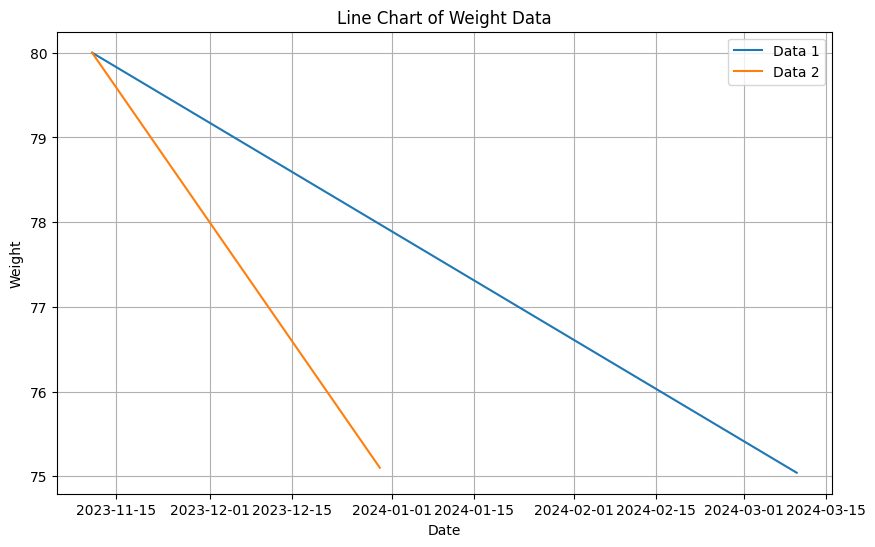

In [76]:
dates = pd.date_range(start="2023-11-11", periods=weight_change_result['total_days'])
weight_kg = user_data["weight_kg"]
weights = [weight_kg]
# Iterasi untuk menghitung berat badan setiap hari
for day in range(1, weight_change_result['total_days']):
    weight_kg += weight_change_result['average_calories_per_day'] / 7700
    weights.append(weight_kg)

# Buat DataFrame
df = pd.DataFrame({'Date': dates, 'Weight': weights})

dates_2 = pd.date_range(start="2023-11-11", periods=weight_change_result['total_days_estimate'])
weight_kg = user_data["weight_kg"]
weights = [weight_kg]
# Iterasi untuk menghitung berat badan setiap hari
for day in range(1, weight_change_result['total_days_estimate']):
    weight_kg += weight_change_result['additional_calories_per_day'] / 7700
    weights.append(weight_kg)

# Buat DataFrame
df_2 = pd.DataFrame({'Date': dates_2, 'Weight': weights})

df_combined = pd.merge(df, df_2, on='Date', how='outer', suffixes=('_Data1', '_Data2'))

# Buat line chart
plt.figure(figsize=(10, 6))
plt.plot(df_combined['Date'], df_combined['Weight_Data1'], label='Data 1')
plt.plot(df_combined['Date'], df_combined['Weight_Data2'], label='Data 2')
plt.title('Line Chart of Weight Data')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
def calculate_macro(weight_kg, daily_calories, carbs_percentage=50):
    pounds = weight_kg * 2.20462
    protein_cal = pounds * 4 # Change this value based on your desired carb percentage
    fat_percentage = 100 - carbs_percentage

    carb_cal = (daily_calories - protein_cal) * (carbs_percentage / 100)
    fat_cal = (daily_calories - protein_cal) * (fat_percentage / 100)

    protein_gram = pounds
    carbs_gram = carb_cal / 4
    fat_gram = fat_cal / 9

    return {"protein": protein_gram, "carbs": carbs_gram, "fat": fat_gram,
            "protein_percentage": protein_cal, "carbs_percentage": carb_cal, "fat_percentage": fat_cal}

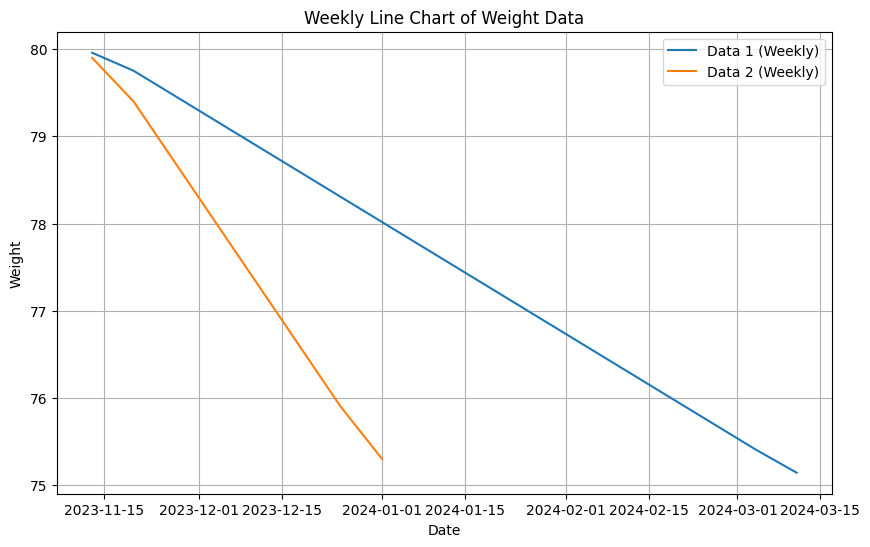

In [88]:
import matplotlib.pyplot as plt

# Buat DataFrame mingguan untuk Data 1
df_weekly_1 = df.set_index('Date').resample('W-Mon').mean().reset_index()

# Buat DataFrame mingguan untuk Data 2
df_weekly_2 = df_2.set_index('Date').resample('W-Mon').mean().reset_index()

# Buat line chart
plt.figure(figsize=(10, 6))
plt.plot(df_weekly_1['Date'], df_weekly_1['Weight'], label='Data 1 (Weekly)')
plt.plot(df_weekly_2['Date'], df_weekly_2['Weight'], label='Data 2 (Weekly)')
plt.title('Weekly Line Chart of Weight Data')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
for idx, row in df_weekly_1.iterrows():
    print(calculate_macro(round(row["Weight"],1), daily_calories=daily_cal))

{'protein': 176.3696, 'carbs': 129.61520000000002, 'fat': 57.606755555555566, 'protein_percentage': 705.4784, 'carbs_percentage': 518.4608000000001, 'fat_percentage': 518.4608000000001}
{'protein': 175.92867599999997, 'carbs': 129.835662, 'fat': 57.70473866666667, 'protein_percentage': 703.7147039999999, 'carbs_percentage': 519.342648, 'fat_percentage': 519.342648}
{'protein': 175.26728999999997, 'carbs': 130.166355, 'fat': 57.851713333333336, 'protein_percentage': 701.0691599999999, 'carbs_percentage': 520.66542, 'fat_percentage': 520.66542}
{'protein': 174.60590399999998, 'carbs': 130.497048, 'fat': 57.998688, 'protein_percentage': 698.4236159999999, 'carbs_percentage': 521.988192, 'fat_percentage': 521.988192}
{'protein': 173.944518, 'carbs': 130.827741, 'fat': 58.14566266666667, 'protein_percentage': 695.778072, 'carbs_percentage': 523.310964, 'fat_percentage': 523.310964}
{'protein': 173.28313199999997, 'carbs': 131.15843400000003, 'fat': 58.292637333333346, 'protein_percentage': 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk membuat stacked bar plot
def create_stacked_bar_plot(daily_macro, selected_food):
    # Hitung total macro dari makanan yang dipilih
    selected_food_df = pd.DataFrame(selected_food.values(), index=selected_food.keys(), columns=["Calories", "Protein", "Carbs", "Fat"])
    total_selected_macro = selected_food_df.sum()

    # Buat DataFrame untuk persentase
    percentage_df = pd.DataFrame({
        "Selected Food": total_selected_macro.values,
        "Selected Food (%)": round((total_selected_macro / pd.Series(daily_macro)) * 100),
        "Daily Macro": pd.Series(daily_macro),
        "Daily Macro (%)": round(100 - ((total_selected_macro / pd.Series(daily_macro)) * 100)).clip(lower=0),
        "Exceeds": total_selected_macro.values > pd.Series(daily_macro)
    }, index=total_selected_macro.index)

    return percentage_df

# Contoh penggunaan
daily_macro = {"Calories": 2000, "Protein": 150, "Carbs": 200, "Fat": 50}
selected_food = {"Chicken": [400, 30, 0, 10], "Rice": [150, 3, 30, 1], "Broccoli": [50, 5, 10, 30], "Meat": [1500, 120, 100, 40]}
percentage_df = create_stacked_bar_plot(daily_macro, selected_food)

In [57]:
percentage_df

,Selected Food,Selected Food (%),Daily Macro,Daily Macro (%),Exceeds
Calories,2100,105.0,2000,0.0,True
Protein,158,105.0,150,0.0,True
Carbs,140,70.0,200,30.0,False
Fat,81,162.0,50,0.0,True


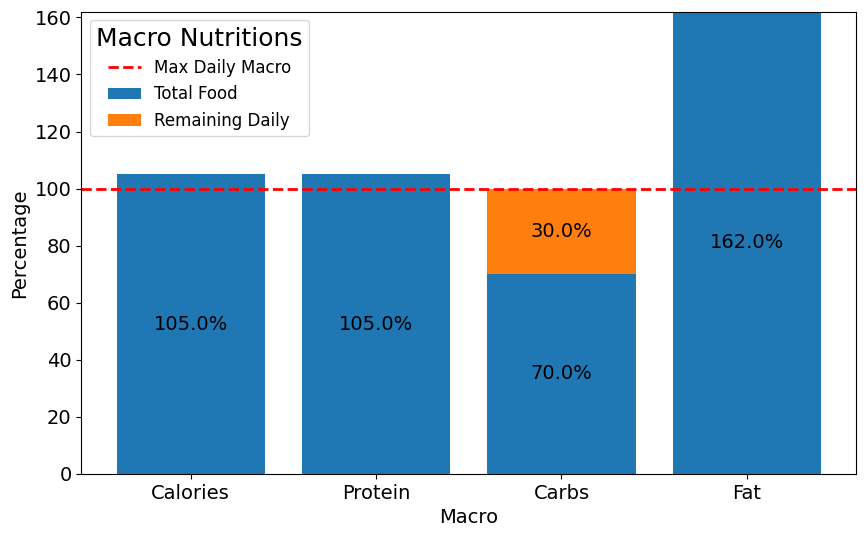

In [67]:
# Buat stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(percentage_df.index, percentage_df['Selected Food (%)'], label="Selected Food (%)")
ax.bar(percentage_df.index, percentage_df['Daily Macro (%)'], bottom=percentage_df['Selected Food (%)'], label="Daily Macro (%)")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, label_type="center", labels=labels, size=14)

ax.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Target 100%')

ax.tick_params(labelsize=14, labelrotation=0)
ax.set_ylabel("Percentage", size=14)
ax.set_xlabel("Macro", size=14)

ax.legend(labels=['Max Daily Macro', 'Total Food', 'Remaining Daily'],
          fontsize=12,
          title='Macro Nutritions',
          title_fontsize=18
          )

plt.show()

In [3]:
import pkg_resources

libraries = ['pandas', 'scikit-learn', 'streamlit', 'plotly', 'numpy']

for lib in libraries:
    try:
        version = pkg_resources.get_distribution(lib).version
        print(f"{lib}=={version}")
    except pkg_resources.DistributionNotFound:
        print(f"{lib}: not installed")


pandas==1.5.3
scikit-learn==1.2.1
streamlit==1.25.0
plotly==5.15.0
numpy==1.24.1
